# Netflix movies and TV Shows

In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the data and checking shape and top 3 rows

In [2]:
netflix=pd.read_csv('netflix_titles.csv')
netflix.shape

(6234, 12)

In [3]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


Info() gives us the details about types of features in our data.

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Checking the null values in the data.

In [5]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Director,cast,country and rating contains null values.So we replaced them with unknown and for rating we replaced with most repeated rating. 

In [6]:
netflix['director'].fillna('unknown',inplace=True)
netflix['cast'].fillna('unknown',inplace=True)
netflix['country'].fillna('unknown',inplace=True)
netflix['rating'].fillna(netflix['rating'].mode()[0],inplace=True)
netflix.drop(['date_added'],axis=1,inplace=True)

Below we again checked for null value count and it is 0.

In [7]:
netflix.isnull().sum().sum()

0

# Type feature

First checking the categories in type feature and visualising them using countplot and pie plot.

In [8]:
netflix['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

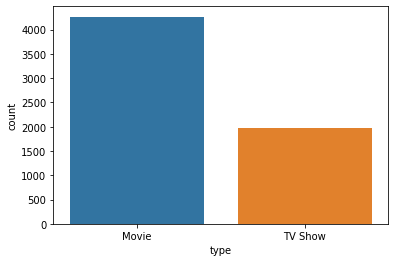

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(netflix['type'])

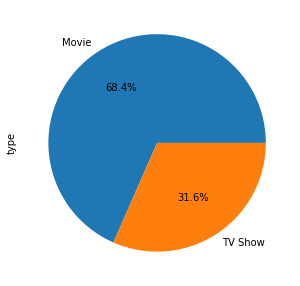

In [10]:
netflix['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))

# Duration feature cleaning

Duration feature containes text in it,so first we are removing text using simple regex and then doing the visualisations.

In [11]:
import re
def remove_text(text):
    text=re.sub("\D", "", text)
    return text
netflix['duration']=netflix['duration'].apply(lambda x:remove_text(x))

In [12]:
netflix['duration'].head()

0    90
1    94
2     1
3     1
4    99
Name: duration, dtype: object

Dividing the dataset into movies and tv shows. 

In [13]:
movies=netflix[netflix['type']=='Movie']
tv_shows=netflix[netflix['type']=='TV Show']

# release_year feature

First we will see distribution of release year of overall dataset.As shown below most of the movies and tv shows are in between 2000 and 2019.

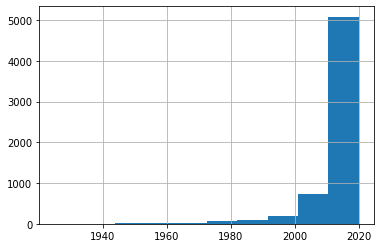

In [14]:
netflix['release_year'].hist()

Now using kdeplot we are seperately visualising the release years of movies and tv shows.As we already known most of them are released b/w 2000 and 2019

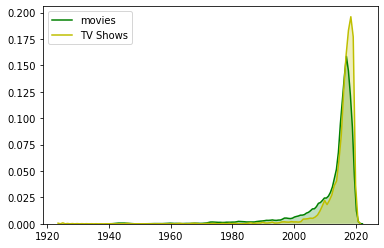

In [15]:
sns.kdeplot(movies['release_year'],color='g',shade=True,label='movies')
sns.kdeplot(tv_shows['release_year'],color='y',shade=True,label='TV Shows')

# Duration feature

First we will see distribution of movies duration,as shown below most of them are having durations b/w 70 and 140 minutes.

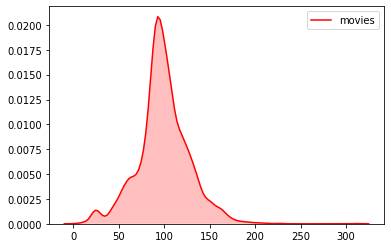

In [16]:
sns.kdeplot(movies['duration'],color='r',shade=True,label='movies')

Now we will see distribution of tv shows duration,as shown below most of the shows have only 1 season and for few shows has 2 and 3 seasons.

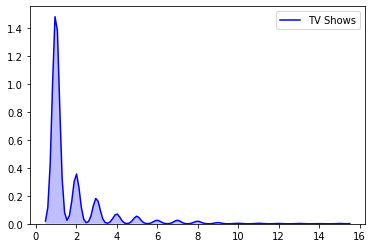

In [17]:
sns.kdeplot(tv_shows['duration'],color='b',shade=True,label='TV Shows')

# Ratings feature

First we will see categories in ratings and then we will visualise them based on movies and tv shows seperatly.

In [18]:
movies['rating'].value_counts()

TV-MA       1356
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64

Top 5  movie ratings 

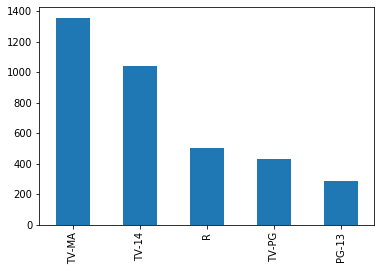

In [19]:
movies['rating'].value_counts()[:5].plot(kind='bar')

Top 5 tv shows ratings.

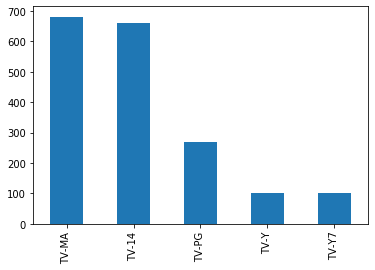

In [20]:
tv_shows['rating'].value_counts()[:5].plot(kind='bar')

# listed_in(category) feature

First we will see top 10 most released categories,as shown below documentaries type is most relesed followed by stand by comedy.

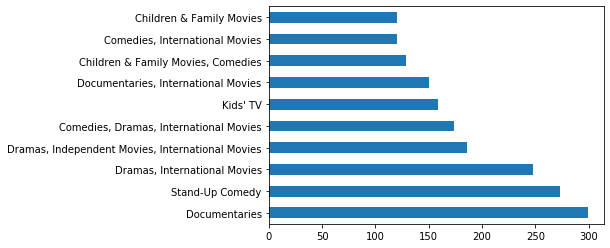

In [21]:
netflix['listed_in'].value_counts()[:10].plot(kind='barh')

Top 10 movie categories

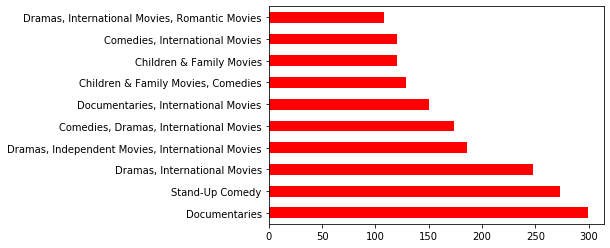

In [22]:
movies['listed_in'].value_counts()[:10].plot(kind='barh',color='r')

Top 10 tv shows categories

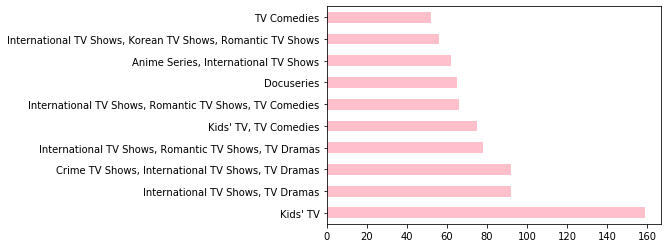

In [23]:
tv_shows['listed_in'].value_counts()[:10].plot(kind='barh',color='pink')

# Country feature

Top 10 countries by movies

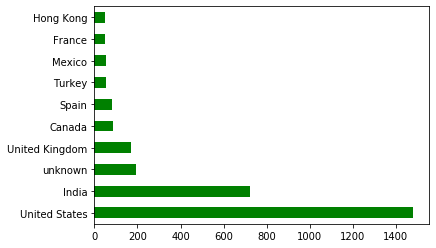

In [24]:
movies['country'].value_counts()[:10].plot(kind='barh',color='green')

Top 10 countries by tv shows

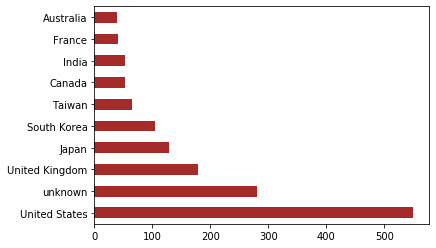

In [25]:
tv_shows['country'].value_counts()[:10].plot(kind='barh',color='brown')

# Director feature

Top 10 most directed ditectors names

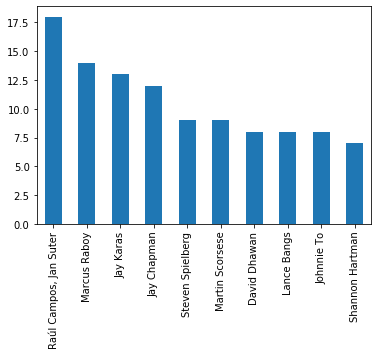

In [26]:
movies['director'].value_counts()[1:11].plot(kind='bar')

Top 10 directors who director most number of tv shows

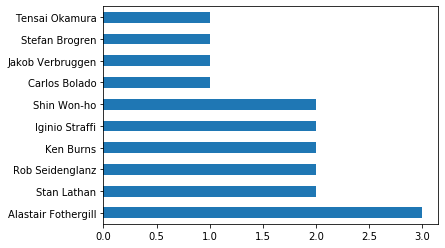

In [27]:
tv_shows['director'].value_counts()[1:11].plot(kind='barh')

# Get detailes of movies,tv shows directored by particular director along with release year and category

Here we write a simple function to get our results.For example,as shown below we got the movies and tv shows directored by steven spielberg. 

In [28]:
def get_director(director):
     return netflix.loc[netflix['director']==director,['title','release_year','listed_in']]
get_director('Steven Spielberg')    

,title,release_year,listed_in
1183,The Adventures of Tintin,2011,Children & Family Movies
1579,War Horse,2011,Dramas
3490,Catch Me If You Can,2002,Dramas
3613,Indiana Jones and the Kingdom of the Crystal S...,2008,"Action & Adventure, Children & Family Movies, ..."
3614,Indiana Jones and the Last Crusade,1989,"Action & Adventure, Children & Family Movies, ..."
3615,Indiana Jones and the Raiders of the Lost Ark,1981,"Action & Adventure, Children & Family Movies, ..."
3616,Indiana Jones and the Temple of Doom,1984,"Action & Adventure, Children & Family Movies, ..."
3877,Lincoln,2012,Dramas
5541,Schindler's List,1993,"Classic Movies, Dramas"


# Get movies or tv shows released in particular year

Below i write a simple function,and as you see we get movies released in 2019 and tv shows in 2010

In [29]:
def movies_shows(data,year):
    return data.loc[data['release_year']==year,['title']].head()
movies_shows(movies,2019)

,title
0,Norm of the North: King Sized Adventure
35,Article 15
38,Kill Me If You Dare
44,American Factory: A Conversation with the Obamas
57,The World We Make


In [30]:
movies_shows(tv_shows,2010)

,title
198,Ancient Aliens
218,Pawn Stars
410,Lucky Days
414,The Fierce Wife
415,The Womanizer


# Words clouds

Below are various wordclouds of movies and tv shows titles,directors and cast.

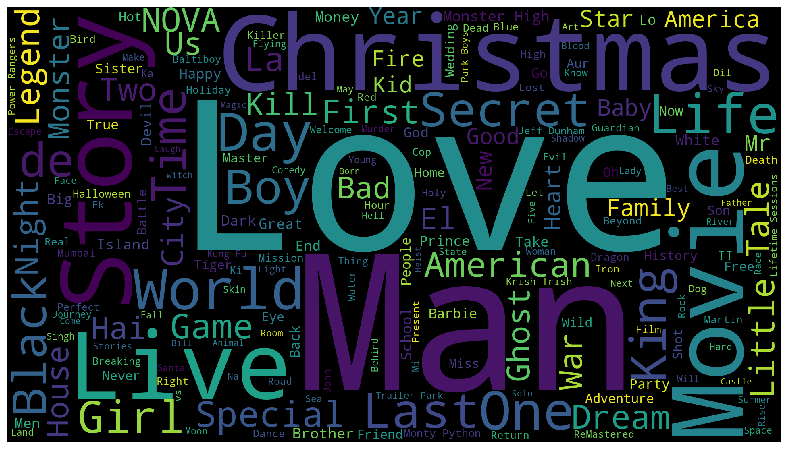

In [32]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(movies['title']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()

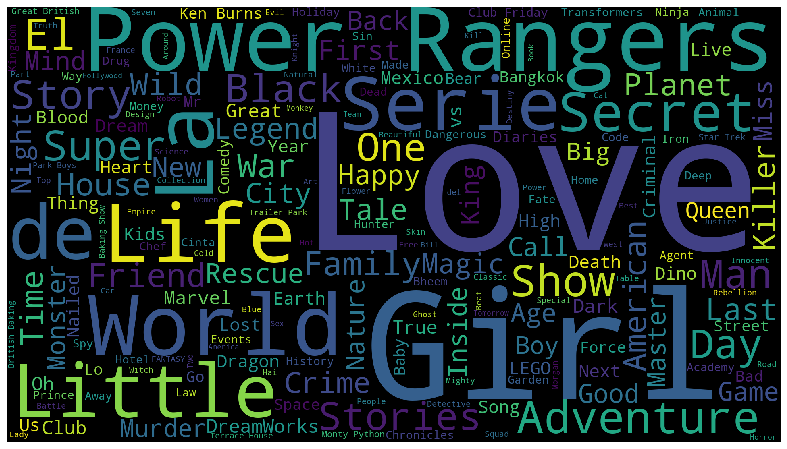

In [33]:
plt.subplots(figsize=(25,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(tv_shows['title']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()

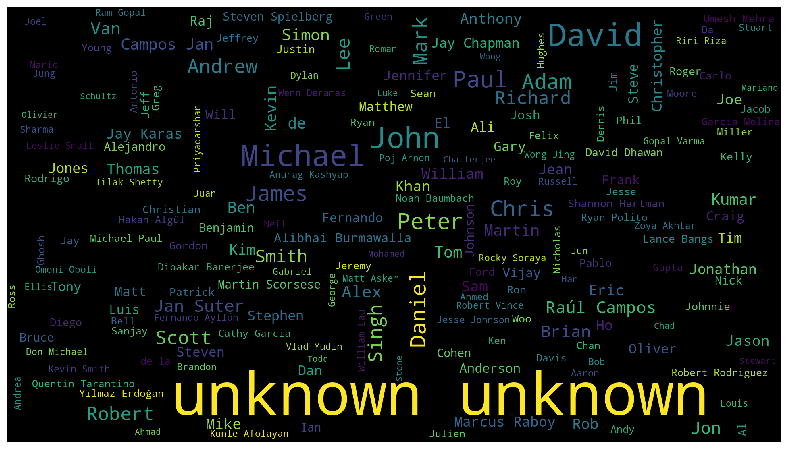

In [34]:
plt.subplots(figsize=(25,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix['director']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()

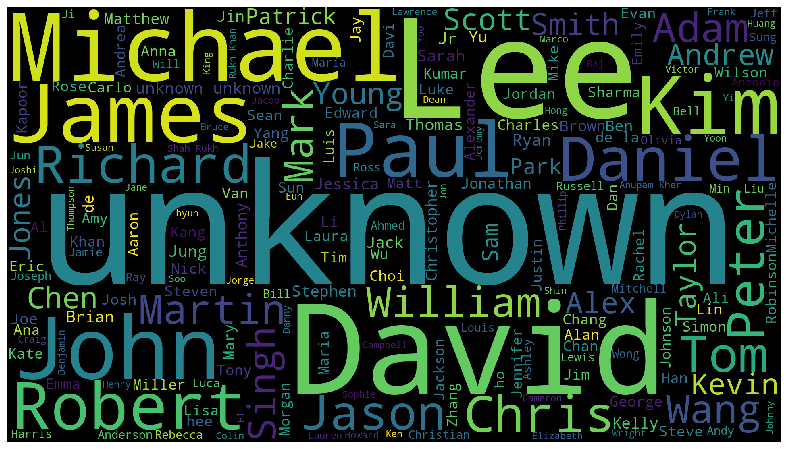

In [35]:
plt.subplots(figsize=(25,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix['cast']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()